## Generate Data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


x = np.random.rand (100)
y = 2 + np.sin(2 * np.pi * x) + np.random.uniform(-0.1, 0.1, len(x))

In [2]:
len(x)
test_set_x = np.random.rand (20)
test_set_y = 2 + np.sin(2 * np.pi * test_set_x) + np.random.uniform(-0.1, 0.1, len(test_set_x))

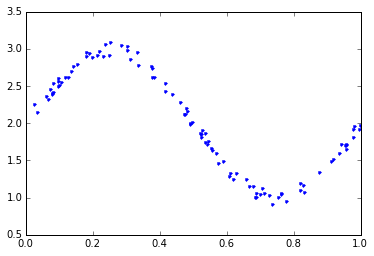

In [3]:
plt.plot(x, y,'.')

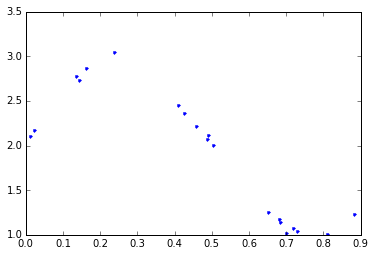

In [4]:
plt.plot(test_set_x, test_set_y,'.')

In [5]:
## Linear regression

In [41]:
def calc_hypo (parameters, x):
    hypo = parameters [0]
    powered_x = x
    for i in range(1, len(parameters)):
        hypo = hypo + powered_x * parameters[i]
        powered_x = powered_x * x
    return hypo

def linear_regression(xs, ys, num_param, alpha):
    parameters = [0] * num_param
    for iter in range(100000):
        for j in range(len(xs)):
            # calculate hyporthesis
            x = xs[j]
            hypo = calc_hypo (parameters, x)
        
            # update parameters
            powered_x = 1
            for i in range(len(parameters)): 
                parameters[i] = parameters[i] + alpha * (ys[j] - hypo) * powered_x 
                powered_x = powered_x * x
    
    return parameters

In [42]:
def error(test_set_x, test_set_y, parameters):
    error = 0
    for j in range(len(test_set_x)):
        hypo = calc_hypo (parameters, test_set_x[j])
        error =  error + np.power((hypo - test_set_y[j]), 2)
    return error/2   
    

In [43]:
## train model
best_polynome = 0
best_error = 100

for polynom in range(1, 25):
    parameters = linear_regression (x, y, polynom, 0.005)
    er = error (test_set_x, test_set_y, parameters)
    print er
    if er < best_error:
        best_error = er
        best_polynome = polynom

print best_polynome
print best_error

model = calc_hypo (parameters, x)

4.89507547311
1.85106316072
2.06649930561
0.0703831843563
0.0346627149414
0.0339148551437
0.0234615091775
0.0346390684018
0.047886196163


KeyboardInterrupt: 

In [71]:
parameters = linear_regression (x, y, 7, 0.01)
err = error(x, y, parameters)

parameters1 = linear_regression (x, y, 4, 0.01)
err1 = error(x, y, parameters1)

parameters2 = linear_regression (x, y, 8, 0.01)
err2 = error(x, y, parameters2)

x_sorted = np.arange(0,1,0.01)
model = calc_hypo (parameters, x_sorted)

In [74]:
x_sorted = np.arange(0,1,0.01)
model = calc_hypo (parameters2, x_sorted)

In [72]:
test_err = error(test_set_x, test_set_y, parameters)
test_err1 = error(test_set_x, test_set_y, parameters1)
test_err2 = error(test_set_x, test_set_y, parameters2)

print "model 1"
print err
print test_err

print "\nmodel2"
print err1
print test_err1

print "\nmodel3"
print err2
print test_err2

model 1
0.258222142179
0.0510749296007

model2
0.375708541967
0.0814439150915

model3
0.198075085725
0.0589390350048


In [75]:
perfect_sine = 2 + np.sin(2 * np.pi * x_sorted)

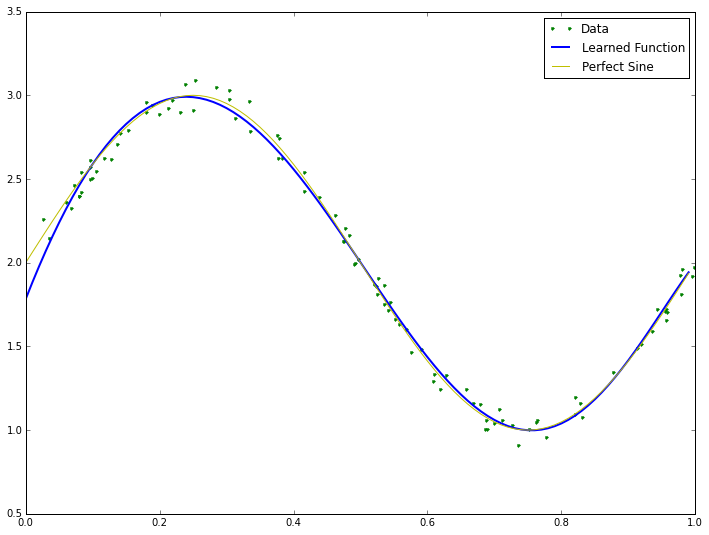

In [76]:
fig_size = [0,0]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

line1, = plt.plot(x, y, '.g', label="Data")
line2, = plt.plot(x_sorted, model, '-b', label="Learned Function", linewidth = 2)
line3, = plt.plot(x_sorted, perfect_sine, '-y', label="Perfect Sine")

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1, line2, line3], loc=1)

In [79]:
print parameters2


[1.782863524617357, 10.226254127197031, -21.254052906337247, -4.8290857552471094, 10.44898836672458, 12.58494094463024, 3.9600298024305194, -10.923115604587759]
